## Calculating the return on investment in S&P 500 stocks.
Hypothesis: The returns on investment in S & P 500 stocks taking into account, the uncertainity in market returns will be higher than the traditional calculation of returns for comparable rate of return/interest per year for a given time period.


In [20]:
# 1.Import needed libraries, set plots to display in notebook

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots


In [21]:
# 2. Regular bank savings  approach for 30 year period.
# The average expected return for the stock is  0.7 which is taken as the interest rate. 


In [22]:
def calculate_savings ( ):
    """
    This function calculates the returns at the end of a given time period in the traditional savings bank approach.
    
    User Inputs:
    principal: The initial amount a user wants to invest at the beginning-->integer
    time Period: The time for which the user wants to know the returns with interest-->integer
    annual_add: The amount added to savings each year--> integer
    interest: Rate of interest for savings bank. --> float.
    Note: If you would like to compare returns from bank and a particular stock ,
    please use the stock's average expected returns as the rate of interest for bank.
    
    
    Returned values: A dictionary with keys p,t, aa for principal. time period and annual additions--> Dictionary
    
    """        
    
    principal = int(input ("Please enter the initial amount you want to invest:  "))
    time_period = int(input ("Please enter the time period you want to calculate returns for:  "))
    annual_add = int(input ("Please enter the amount to be added every year, if none, enter 0:  "))  
    interest = float(input ("Please enter the interest rate in percentage. Note : If you would like to compare with S&P stock returns, The average s&p returns rate is 7%:  "))
    for year in range(time_period):
            ending = (principal) * (1+interest/100) + annual_add
            print((ending))
            principal = ending
     
    return({'p':principal,'t':time_period, 'aa':annual_add})
    

     

     
    



In [23]:
# Calling function and saving it's result in a variable
savings=calculate_savings()
print( savings)




Please enter the initial amount you want to invest:  10000
Please enter the time period you want to calculate returns for:  30
Please enter the amount to be added every year, if none, enter 0:  10000
Please enter the interest rate in percentage. Note : If you would like to compare with S&P stock returns, The average s&p returns rate is 7%:  7
20700.0
32149.0
44399.43
57507.390100000004
71532.907407
86540.21092549001
102598.02569027431
119779.88748859352
138164.47961279508
157835.99318569075
178884.51270868912
201406.42859829735
225504.87860017817
251290.22010219065
278880.535509344
308402.1729949981
339990.325104648
373789.6478619734
409954.9232123115
448651.76783717336
490057.39158577553
534361.4089967798
581766.7076265544
632490.3771604133
686764.7035616423
744838.2328109574
806976.9091077244
873465.2927452652
944607.8632374338
1020730.4136640542
{'p': 1020730.4136640542, 't': 30, 'aa': 10000}


In [24]:
def stock_returns(expected_return,volatality,initial):
    """
    Calculates returns from a particular stock based on the time period,  annual additions and  principal amount specified
    for savings approach.
    
    Argument list:
    expected_return: Average expected return for the stock
    volatality: Average volatality of the stock, i.e variance of the expected returns 
    initial: Initial amount being invested.
    
    """
    print("\tReturn", "\t\tEnding Value".rjust(18))
    for year in range(savings['t']):
            market_return = np.random.normal(expected_return, volatality)
            fv = initial * (1 + market_return) + savings['aa']
            print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(fv))
            initial = fv




In [25]:
stock_returns(0.07,.14,10000)


	Return     		Ending Value
	-0.067               	19329.501453235884
	0.2027               	33247.25042870128
	-0.0561               	41382.68143443017
	0.0412               	53085.662269483815
	0.0504               	65763.04253578704
	-0.0569               	72019.96961000378
	-0.0227               	80384.9963265294
	0.026               	92473.38070212617
	0.0046               	102899.2750791019
	0.0742               	120533.79966259973
	0.1813               	152391.38475078924
	0.1152               	179939.67906262746
	0.1247               	212384.81859879548
	0.0287               	228484.59096248398
	0.0387               	247332.26114863565
	0.3515               	344273.2150213012
	0.0215               	361690.8160159367
	0.1523               	426792.66581591615
	0.2122               	527343.2709903056
	-0.2449               	408217.6925059954
	0.0899               	454934.05740021495
	0.1664               	540644.3125148179
	0.0767               	592119.5340153452
	0.2156           

## Average volatility is 14.4%


In [26]:
# 4. Simulate portfolio ending market values 

"""
Uses Monte Carlo simulation to simulate the stock returns over the given time period

Argument list:
expected_ return: Average expected return for the stock
volatality: Average volatality of the stock, i.e variance of the expected returns 
iterations: Number of independent trials to be conducted for calculating expected returns
add: Annual additions to each years starting maount.    
    
"""
def simulations(iterations, expected_return, volatility, add):
 sim = DataFrame()
 
 for x in range(iterations):
        stream = []
        initial= savings['p']
        for i in range(savings['t']):
          end = round(initial * (1 + np.random.normal(expected_return,volatility)) + add,2)
          stream.append(end)
          initial= end
        sim[x] = stream
 return(sim)
    

In [27]:
simulated=simulations(5000, 0.07, .14, 10000)


In [28]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
simulated[first_five]


,0,1,2,3,4
0,1157985.42,957348.56,1075003.12,1304632.28,1188104.61
1,1321662.91,1022799.67,1207875.94,1225036.45,974435.50
2,1326770.79,858088.17,1320245.63,1122967.37,1057996.18
3,1364472.92,766274.60,1415193.81,1185337.37,995990.30
4,1377108.27,957918.24,1213649.46,1391798.88,977759.56
5,1605313.38,681134.34,1573893.15,1549593.70,988455.16
6,1755473.10,774115.23,1746036.38,1926646.19,1236110.21
7,1698181.21,946982.66,2356013.50,2092968.98,1505406.95
8,1811658.47,996516.62,2497347.91,2215695.95,1647460.32
9,1614865.85,1152534.67,2767383.73,2750544.19,1648883.61


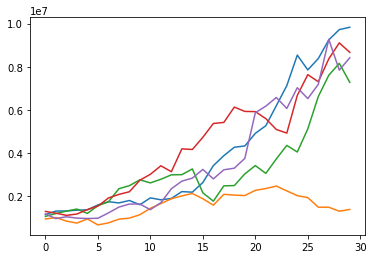

In [29]:
# 6. Plot first five simulated portfolios
plots.plot(simulated[first_five])


In [30]:
# The graphs show that most of the ending values are less than that of the savings ending value at 1020730.41


In [31]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(simulated.loc[29]))
print("Mean: ", (np.mean(simulated.loc[29])))
print("SD: ",(np.std(simulated.loc[29])))
print("Max: ",(np.max(simulated.loc[29])))
print("Min: ", (np.min(simulated.loc[29])))



Count: 5000
Mean:  8647845.226905983
SD:  6597210.006461971
Max:  87891734.01
Min:  711543.41


In [32]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = simulated.loc[29]
ending_values.describe()


count    5.000000e+03
mean     8.647845e+06
std      6.597870e+06
min      7.115434e+05
25%      4.288403e+06
50%      6.790935e+06
75%      1.104012e+07
max      8.789173e+07
Name: 29, dtype: float64

(array([  93.,  276.,  379.,  451.,  486.,  432.,  392.,  283.,  304.,
         256.,  234.,  186.,  182.,  147.,  118.,  112.,   91.,   67.,
          81.,   57.,   43.,   44.,   43.,   21.,   20.,   18.,   16.,
          23.,   18.,   11.,   12.,    4.,    9.,   14.,    8.,    8.,
          10.,    6.,    8.,    3.,    4.,    8.,    1.,    3.,    2.,
           3.,    0.,    0.,    1.,    0.,    1.,    2.,    0.,    0.,
           0.,    0.,    0.,    1.,    1.,    0.,    0.,    1.,    2.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   711543.41      ,   1583345.316     ,   2455147.222     ,
          3326949.128     ,   4198751.034     ,   5070552.94      ,
          5942354.846     ,   6814156.752     ,   7685958.658     ,
      

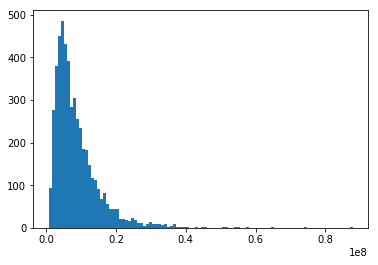

In [33]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)


In [36]:
# 11. The probability of seeing an ending value more  than savings.

len(ending_values[ending_values>savings['p']])*100 / len(ending_values)


99.7